In [3]:
paths_to_results = [ # baselines (if compare)
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.6.json.gz",
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.7.json.gz",
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.8.json.gz",
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.9.json.gz",
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp1.0.json.gz",
]
compare = []
from pathlib import Path
for p in paths_to_results + compare:
    assert Path(p).exists(), f"Path {p} doesn't exist!"

In [4]:
from coderm.eval.metrics import get_pass_ks
from coderm.utils import gunzip_json_read
import numpy as np

all_pass_ks = {}
for r in (paths_to_results + compare):
    print(f"Reading", r)
    items = gunzip_json_read(r)["items"]
    upper_k = len(items[0]["results"])
    pass_ks = {}
    for k in range(1, upper_k+1):
        pass_ks[k] = np.mean(get_pass_ks(items, k))
    all_pass_ks[r] = pass_ks

Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.6.json.gz
Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.7.json.gz
Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.8.json.gz
Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.9.json.gz
Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp1.0.json.gz


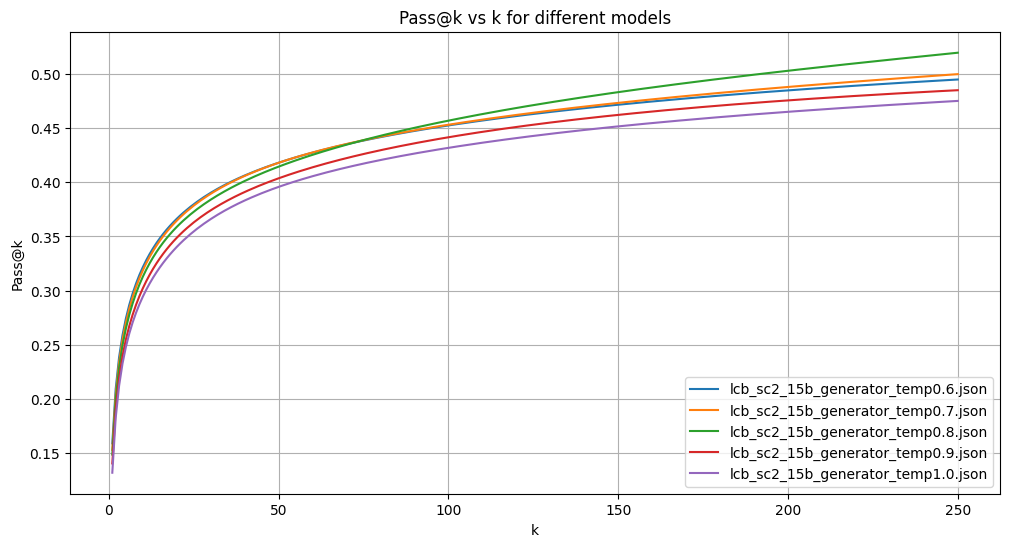

In [5]:
import matplotlib.pyplot as plt
from pathlib import Path
plt.figure(figsize=(12, 6))
for label, values in all_pass_ks.items():
    ks = list(values.keys())
    pass_at_k = list(values.values())
    linestyle = '--' if any(p in label for p in paths_to_results) and len(compare) > 0 else '-'
    plt.plot(ks, pass_at_k, label=Path(label).stem, linestyle=linestyle)

plt.xlabel('k')
plt.ylabel('Pass@k')
plt.title('Pass@k vs k for different models')
plt.legend()
plt.grid(True)
plt.show()

# ORM Pass@{1, n}

In [6]:
paths_to_results = [
    "../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_15b.json.gz",
    "../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_7b.json.gz",
    "../../../results/orm_results/lcb_generator_sc2_7b_temp08_orm_15b.json.gz",
    "../../../results/orm_results/lcb_generator_sc2_7b_temp08_orm_7b.json.gz",
]
from pathlib import Path
for p in paths_to_results:
    assert Path(p).exists(), f"Path {p} doesn't exist!"

In [7]:
from coderm.eval.metrics import get_orm_acc
from coderm.utils import gunzip_json_read
import numpy as np
from tqdm import tqdm

all_orm_accs = {}
for r in (paths_to_results + compare):
    print(f"Reading", r)
    items = gunzip_json_read(r)["items"]
    upper_n = len(items[0]["results"])
    orm_accs = {}
    for n in tqdm(list(range(1, upper_n+1))):
        orm_accs[n] = np.mean(get_orm_acc(items, n=n, perms=100)[0])
    all_orm_accs[r] = orm_accs

Reading ../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_15b.json.gz


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:04<00:00,  1.56it/s]


Reading ../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_7b.json.gz


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:56<00:00,  1.76it/s]


Reading ../../../results/orm_results/lcb_generator_sc2_7b_temp08_orm_15b.json.gz


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:56<00:00,  1.76it/s]


Reading ../../../results/orm_results/lcb_generator_sc2_7b_temp08_orm_7b.json.gz


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:57<00:00,  1.74it/s]


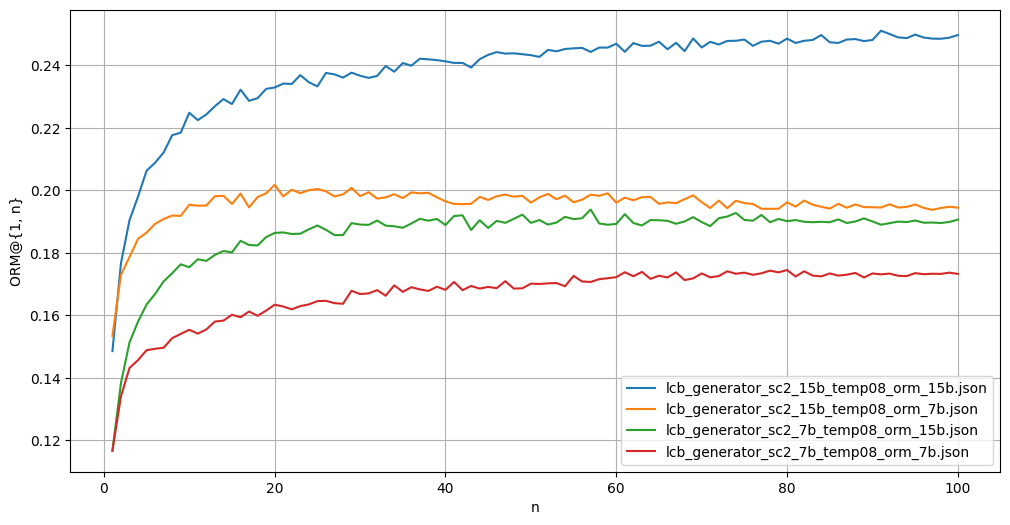

In [8]:
import matplotlib.pyplot as plt
from pathlib import Path
plt.figure(figsize=(12, 6))
for label, values in all_orm_accs.items():
    ks = list(values.keys())
    pass_at_k = list(values.values())
    linestyle = '--' if any(p in label for p in paths_to_results) and len(compare) > 0 else '-'
    plt.plot(ks, pass_at_k, label=Path(label).stem, linestyle=linestyle)

plt.xlabel('n')
plt.ylabel('ORM@{1, n}')
plt.legend()
plt.grid(True)
plt.show()

# ORM Pass@{k, 100} vs Pass@k

In [9]:
paths_to_results = [
    "../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_15b.json.gz",
]
from pathlib import Path
for p in paths_to_results:
    assert Path(p).exists(), f"Path {p} doesn't exist!"

In [10]:
from coderm.eval.metrics import get_orm_acc, get_pass_ks
from coderm.utils import gunzip_json_read
import numpy as np
from tqdm import tqdm

all_orm_accs = {}
all_passk_accs = {}
for r in paths_to_results:
    print(f"Reading", r)
    items = gunzip_json_read(r)["items"]
    upper_n = len(items[0]["results"])
    orm_accs = {}
    passk_accs = {}
    for k in tqdm(list(range(1, upper_n+1))):
        orm_accs[k] = np.mean(get_orm_acc(items, n=upper_n, k=k)[0])
        passk_accs[k] = np.mean(get_pass_ks(items, k=k))
    all_orm_accs[r] = orm_accs
    all_passk_accs[r] = passk_accs

Reading ../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_15b.json.gz


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 69.10it/s]


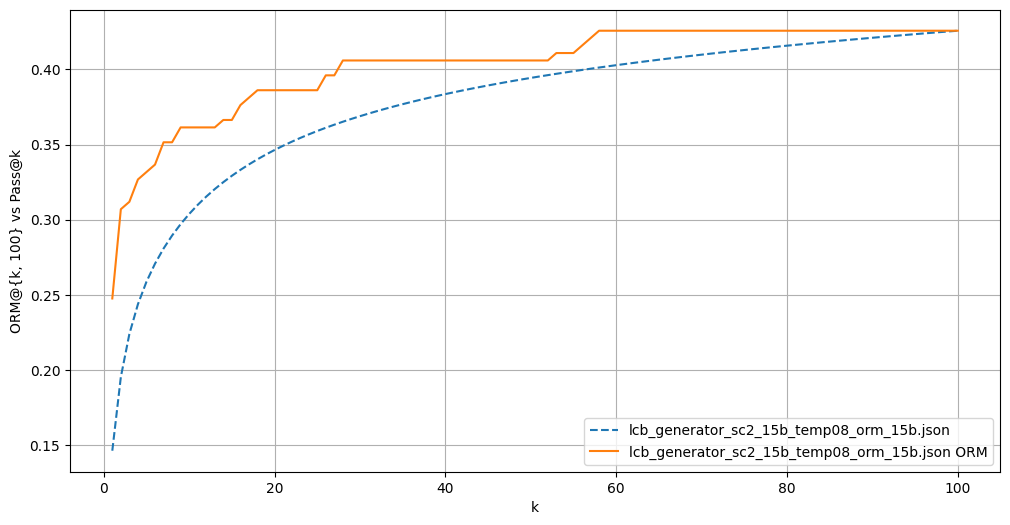

In [11]:
import matplotlib.pyplot as plt
from pathlib import Path
plt.figure(figsize=(12, 6))

for label, values in all_passk_accs.items():
    ks = list(values.keys())
    pass_at_k = list(values.values())
    linestyle = '--'
    plt.plot(ks, pass_at_k, label=Path(label).stem, linestyle=linestyle)

for label, values in all_orm_accs.items():
    ks = list(values.keys())
    orm_acc = list(values.values())
    linestyle = '-'
    plt.plot(ks, orm_acc, label=Path(label).stem + " ORM", linestyle=linestyle)


plt.xlabel('k')
plt.ylabel('ORM@{k, 100} vs Pass@k')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
def compute_orm_accuracy(params):
    items, k, n, perms = params
    orm_acc = np.mean(get_orm_acc(items, n=n, k=k, perms=perms)[0])
    return k, n, orm_acc

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from coderm.eval.metrics import get_orm_acc
from coderm.utils import gunzip_json_read
import numpy as np
from tqdm import tqdm
import matplotlib.colors as mcolors
from pathlib import Path
from multiprocess import Pool
import os

chunksize = 256

p = "../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_15b.json.gz"
assert Path(p).exists(), f"Path {p} doesn't exist!"

print(f"Reading", p)
items = gunzip_json_read(p)["items"]
upper_n = len(items[0]["results"]) 
upper_n = 100
orm_accs = {}

params_list = [(items, k, n, 10) for k in range(1, upper_n+1) for n in range(1, upper_n+1)]

with Pool(processes=os.cpu_count()) as pool: 
    results = list(tqdm(pool.imap(compute_orm_accuracy, params_list, chunksize=chunksize), total=len(params_list)))
    
for k, n, acc in results:
    orm_accs[(k, n)] = acc

Reading ../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_15b.json.gz


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:48<00:00, 206.58it/s]


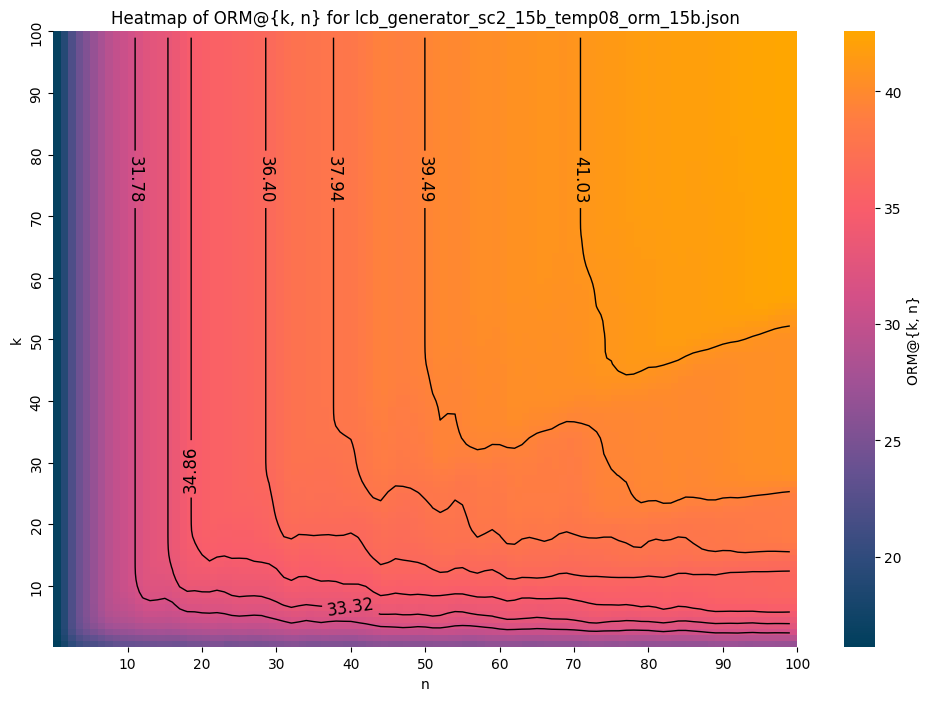

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.colors as mcolors
from pathlib import Path

# Define the custom color map
colors = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Assuming 'orm_accs' is a dictionary with (k, n) keys and accuracy values scaled by 100
data = []
ks = []
ns = []
for (k, n), acc in orm_accs.items():
    ks.append(k)
    ns.append(n)
    data.append(acc * 100)  # Multiply by 100 to scale the accuracy percentage
df = pd.DataFrame({'k': ks, 'n': ns, 'Accuracy': data})
pivot_table = df.pivot(index="k", columns="n", values="Accuracy")

# Apply Gaussian smoothing
smoothed_data = gaussian_filter(pivot_table, sigma=1)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(smoothed_data, cmap=cmap, cbar_kws={'label': 'ORM@{k, n}'})
contours = plt.contour(smoothed_data, levels=np.linspace(np.percentile(smoothed_data, 15), smoothed_data.max(), 8), colors='black', linewidths=1.0)
plt.clabel(contours, inline=True, fontsize=12)
plt.title(f'Heatmap of ORM@{{k, n}} for {Path(p).stem}')

# Adjust tick marks to start from zero and step by 10
xtick_marks = np.arange(0, pivot_table.shape[1] + 1, 10)[1:]
ytick_marks = np.arange(0, pivot_table.shape[0] + 1, 10)[1:]
plt.xticks(xtick_marks, xtick_marks, rotation=0.5)
plt.yticks(ytick_marks, ytick_marks)

# Invert y-axis to have the lowest index at the bottom and increase upwards
ax.invert_yaxis()

plt.xlabel('n')
plt.ylabel('k')
plt.show()